In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(['CustomerID'], axis=1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
data.shape

(200, 4)

In [6]:
# statistical info
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

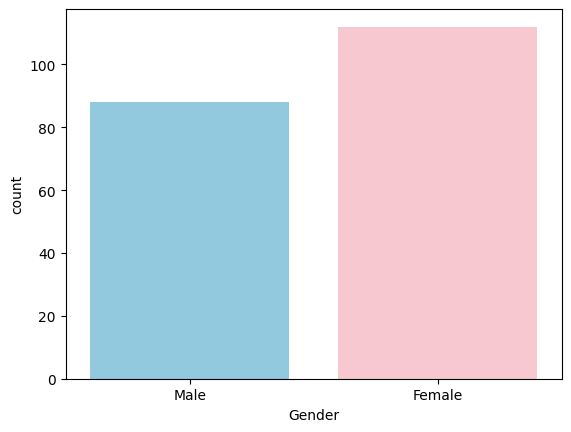

In [8]:
sns.countplot(x = 'Gender', data = data, palette = ['skyblue','pink'])

<Axes: xlabel='Age', ylabel='Density'>

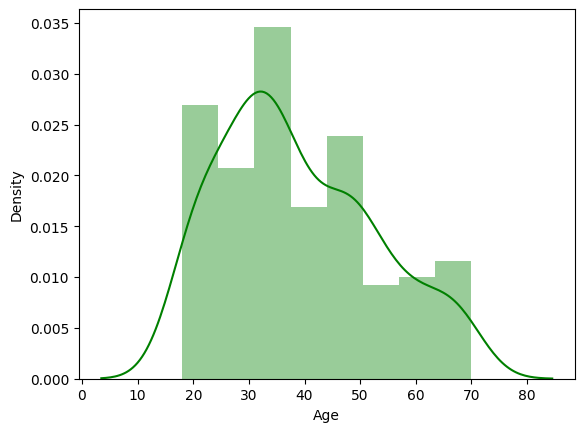

In [9]:
sns.distplot(data['Age'], color = 'green')

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

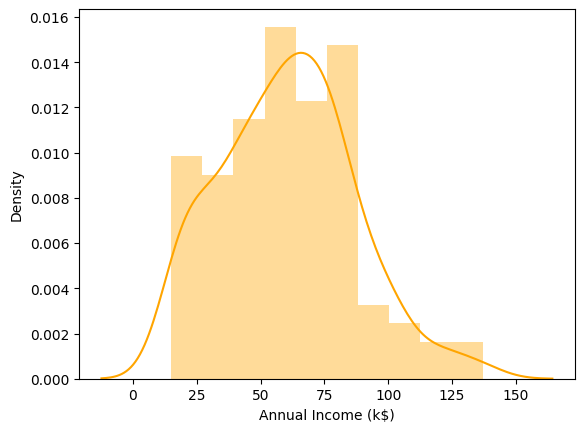

In [10]:
sns.distplot(data['Annual Income (k$)'], color = 'orange')

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

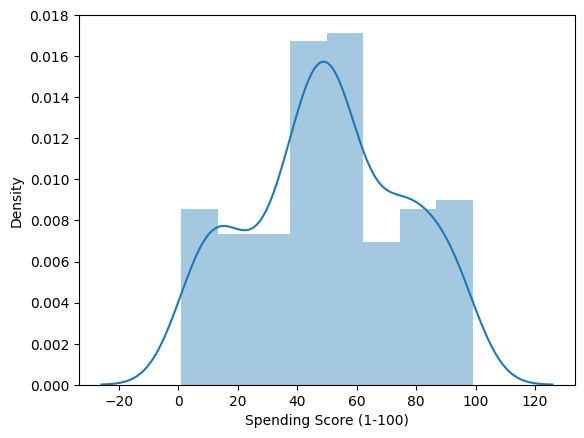

In [11]:
sns.distplot(data['Spending Score (1-100)'])

# Correlation Matrix

<Axes: >

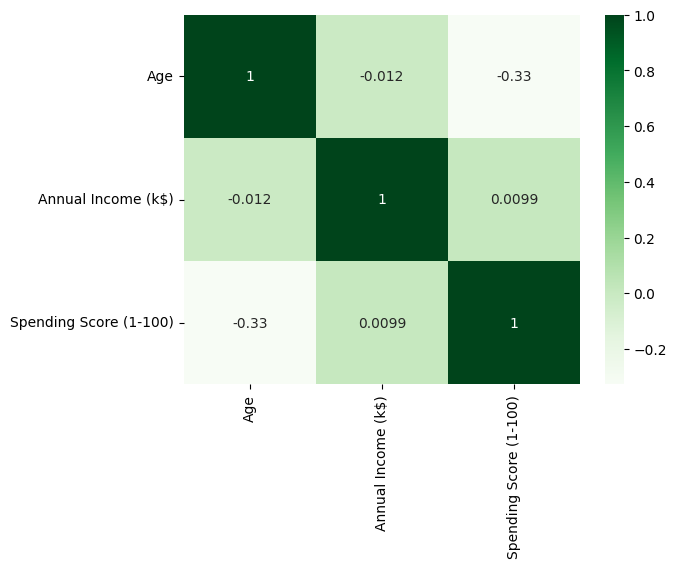

In [12]:
#exclude gender
df = data.loc[:, data.columns!='Gender']
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Greens')

# Clustering

In [13]:
# cluster on 2 features
data1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

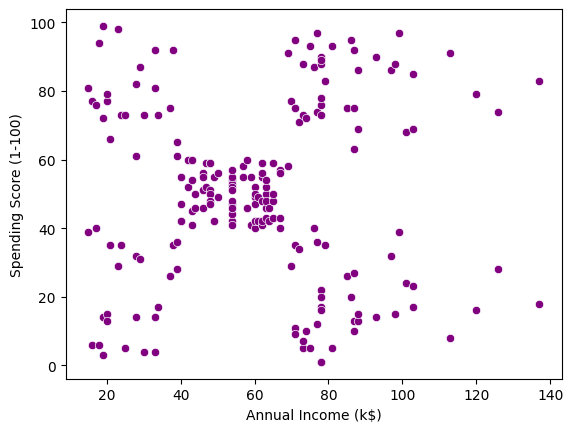

In [14]:
# scatter plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, color='purple')

In [15]:
from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    errors.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

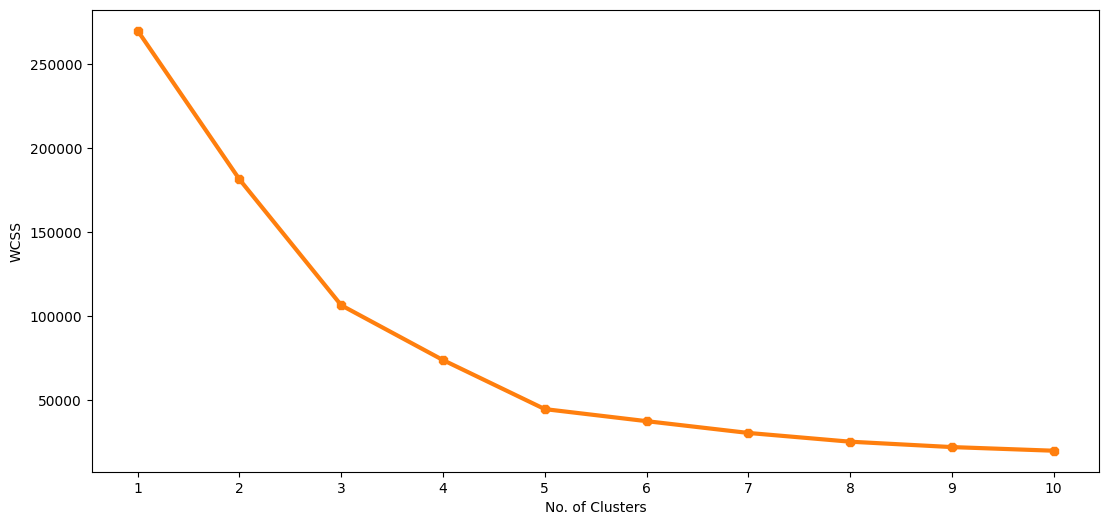

In [16]:
# plot the results for elbow method

plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, marker='8')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11))
plt.show

In [17]:
km = KMeans(n_clusters=5)
km.fit(data1)
y = km.predict(data1)
data1['Label'] = y
data1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

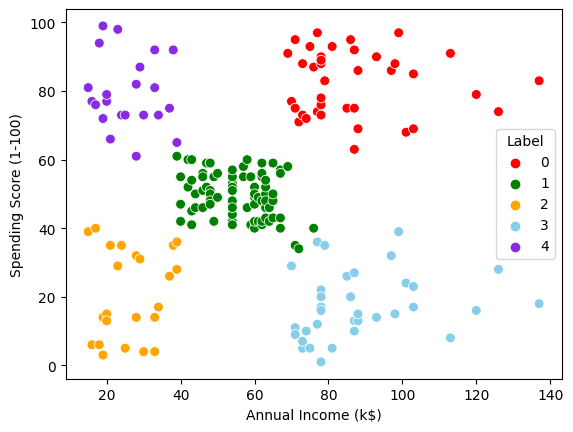

In [18]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data1, hue='Label', s=50, palette = ['red', 'green', 'orange', 'skyblue', 'blueviolet'])

In [19]:
# cluster on 3 features
data2 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [20]:
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    errors.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

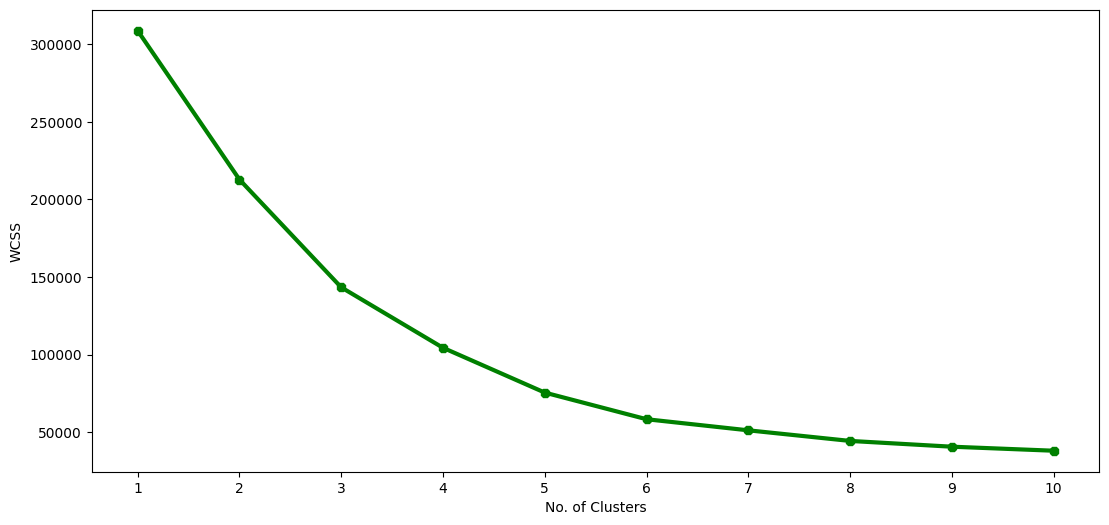

In [21]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, marker='8', color='green')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11))
plt.show

In [22]:
km = KMeans(n_clusters=5)
km.fit(data2)
y = km.predict(data2)
data2['Label'] = y
data2.head()

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


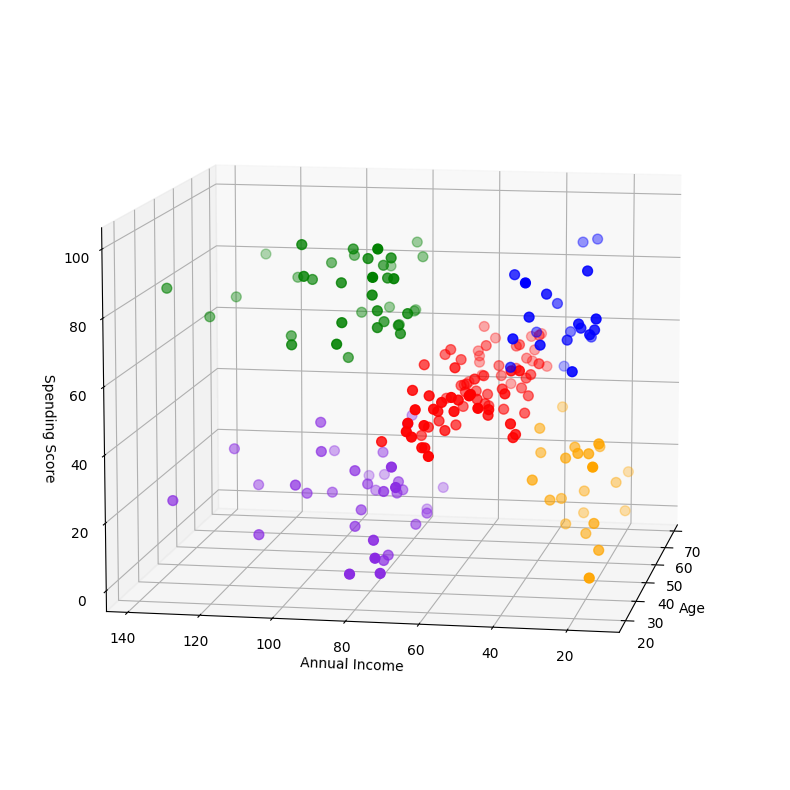

In [23]:
# 3d scatter plot

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data2['Age'][data2['Label']==0], data2['Annual Income (k$)'][data2['Label']==0], data2['Spending Score (1-100)'][data2['Label']==0], c='orange', s=50)
ax.scatter(data2['Age'][data2['Label']==1], data2['Annual Income (k$)'][data2['Label']==1], data2['Spending Score (1-100)'][data2['Label']==1], c='green', s=50)
ax.scatter(data2['Age'][data2['Label']==2], data2['Annual Income (k$)'][data2['Label']==2], data2['Spending Score (1-100)'][data2['Label']==2], c='blueviolet', s=50)
ax.scatter(data2['Age'][data2['Label']==3], data2['Annual Income (k$)'][data2['Label']==3], data2['Spending Score (1-100)'][data2['Label']==3], c='red', s=50)
ax.scatter(data2['Age'][data2['Label']==4], data2['Annual Income (k$)'][data2['Label']==4], data2['Spending Score (1-100)'][data2['Label']==4], c='blue', s=50)
ax.view_init(10,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()